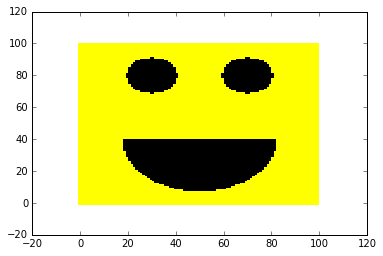

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier


data = []
for i in range(0, 100):
    for j in range(0, 100):
        data.append([i, j])

df = pd.DataFrame(data, columns=['x', 'y'])
df['color'] = 'yellow'

# left eye
idx = ((df['x'] - 30)**2 + (df['y'] - 80)**2 <= 100)
df['color'] = np.where(idx, 'black', 'yellow')

# right eye
idx = ((df['x'] - 70)**2 + (df['y'] - 80)**2 <= 100)
df['color'] = np.where(df['color']!='black', np.where(idx, 'black', 'yellow'), df['color'])

# smile
idx = ((df['x'] - 50)**2 + (df['y'] - 40)**2 <= 1000)
idx = idx & (df['y'] < 40)

df['color'] = np.where(df['color']!='black', np.where(idx, 'black', 'yellow'), df['color'])

for color in ['yellow', 'black']:
#     print color
#     print len(df[df.color==color])
    pl.scatter(df[df.color==color].x, df[df.color==color].y, c=color, marker=',', edgecolors='none')

pl.show()

In [34]:
import random

num_of_pixels = df.shape[0]

arr = range(num_of_pixels)

random.shuffle(arr)
arr = arr[:(num_of_pixels / 2)]

In [43]:
train = df.iloc[arr]
test = df.copy()

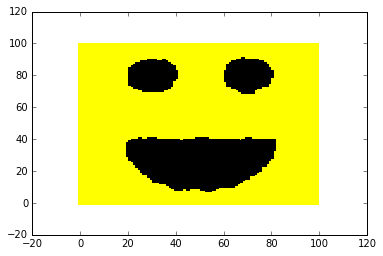

In [44]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(train[['x', 'y']], np.where(train['color']=='black', 1, 0))

preds = clf.predict(test[['x', 'y']])
test.color = np.where(preds==1, 'black', 'yellow')

for color in ['yellow', 'black']:
    pl.scatter(train[train.color==color].x, train[train.color==color].y,
            c=color, marker=',', edgecolors='none')

for color in ['yellow', 'black']:
    pl.scatter(test[test.color==color].x, test[test.color==color].y,
            c=color, marker=',', edgecolors='none')

pl.show()